In [3]:
import tensorflow as tf

In [4]:
from tensorflow.examples.tutorials.mnist import input_data

In [5]:
mnist= input_data.read_data_sets(".\\tmp\\data",one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting .\tmp\data\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting .\tmp\data\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting .\tmp\data\t10k-images-idx3-ubyte.gz
Extracting .\tmp\data\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [6]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [7]:
mnist.train.images.shape

(55000, 784)

In [8]:
type(mnist.train.images)

numpy.ndarray

In [29]:
sample=mnist.train.images[2034].reshape(28,28)

In [30]:
import matplotlib.pyplot as plt

In [31]:
%matplotlib.inline

UsageError: Line magic function `%matplotlib.inline` not found.


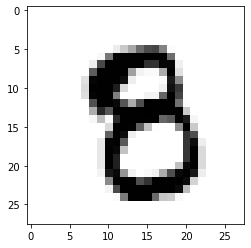

In [32]:
plt.imshow(sample,cmap='Greys')

In [34]:
learning_rate = 0.001
training_epochs = 15
batch_size = 100

In [47]:
n_classes = 10
n_samples = mnist.train.num_examples

In [48]:
n_input =784
n_hidden_1=256
n_hidden_2=256

In [54]:
def mulitlayer_perceptron(x,weights,biases):
    '''
    x: placeholder for data input
    weights: dict of weights
    biases : dict of biases
    '''
    
    # function (x * w + b)
    # RELU function f(x)= max(0,x)
    
    # first hidden layer with RELU activation
    layer1 = tf.add(tf.matmul(x,weights['h1']),bias['b1'])
    layer1 = tf.nn.relu(layer1)
    
    # second hidden layer with RELU activation
    layer2 = tf.add(tf.matmul(layer1,weights['h2']),bias['b2'])
    layer2 = tf.nn.relu(layer2)
    
    # last output layer
    output_layer = tf.add(tf.matmul(layer2,weights['out']),bias['out'])
    return output_layer

In [55]:
weights={
    'h1': tf.Variable(tf.random_normal([n_input,n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1,n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2,n_classes]))
}

Instructions for updating:
Colocations handled automatically by placer.


In [56]:
bias ={
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out' : tf.Variable(tf.random_normal([n_classes]))
}

In [57]:
x = tf.placeholder('float',[None,n_input])

In [58]:
y = tf.placeholder('float',[None,n_classes])

In [59]:
pred = mulitlayer_perceptron(x,weights,bias)

In [61]:
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(pred,y))

In [62]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Training the Model

In [116]:
t =mnist.train.next_batch(1)

In [117]:
Xsamp,Ysamp = t

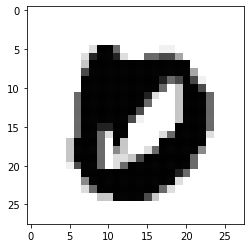

In [119]:
plt.imshow(Xsamp.reshape(28,28), cmap="Greys")

In [120]:
Ysamp

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

### Run the Session

In [121]:
sess = tf.InteractiveSession